# 第18讲 作业

## 1、调研与降维分析


- 数据调研，寻找 MNIST 数据集终结者（以下前两数据集二选一，CIFAR-100不做要求）
    - Fashion MNIST 数据集
    - CIFAR-10 数据集
    - CIFAR-100 数据集


- 完成以下工作
    - 数据集简介
    - EDA
    - PCA 降维分析
    - 取前两个主成分，绘制特征散点图
    - 提取 PCA 对象的 components_ 属性，并绘制图象


- 思考主成分分析方法的原理，简述以下问题
    - 取前几个主成分的道理何在？
    - 主成分分析可以结合已经学过的其它方法吗（如SVM、DT、NB等）？

# Fashion MNIST 数据集

### 简介
* Fashion-MNIST是一个替代MNIST手写数字集的图像数据集。 
* 它是由Zalando（一家德国的时尚科技公司）旗下的研究部门提供。
* 其涵盖了来自10种类别的共7万个不同商品的正面图片。
* Fashion-MNIST的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28x28的灰度图片。

## 导入数据集

In [1]:
import IPython

import sklearn as sk
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
train_data,test_data=tf.keras.datasets.fashion_mnist.load_data()
X_train, y_train=train_data
X_test, y_test=test_data

In [3]:
n_row, n_col = 2, 5
# 定义函数显示图片
def print_digits(images, targets, max_n=10):
    # 设置图片大小
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row)) # figsize = (width, height) 英寸为单位
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # 用目标值进行标注
        p.text(0, -1, str(targets[i]))
        i = i + 1

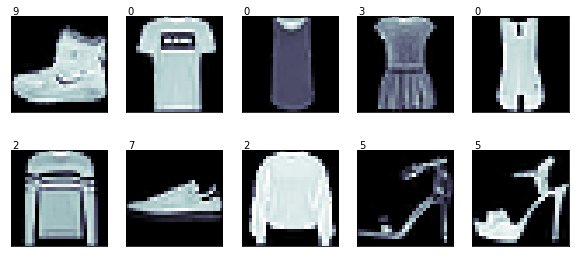

In [4]:
print_digits(X_train, y_train, max_n=10)

| Label | Description |
| --- | ---|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## EDA

#### 观察训练集和测试集维度

In [5]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


#### 将X_train和X_test降为二维数组，方便后续处理

In [6]:
X_train=np.reshape(X_train,(60000,-1))
X_test=np.reshape(X_test,(10000,-1))

In [7]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (60000, 784)
X_test: (10000, 784)


In [8]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## PCA

####  创建 PCA 对象

In [10]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=10) # 10个主成分
X_pca = estimator.fit_transform(X_train)

In [11]:
X_pca.shape  #  X_train 每个样本原来都有 28*28个特征 （28,28）点阵

(60000, 10)

#### 降维后各主成分的累计方差贡献率

In [12]:
X_pca.std(axis=0)

array([1134.94984251,  887.45893364,  516.71886337,  468.93467132,
        413.12569422,  391.80544044,  322.29152493,  290.72258382,
        244.69541541,  241.4492986 ])

#### 取前两个主成分，绘制特征散点图

In [13]:
# 定义绘制散点图函数
N=2000
def plot_pca_scatter(X_pca,legend_name_list):
    # 10 种颜色
    colors = ['black', 'blue', 'purple', 'yellow', 'green', 'red', 'lime', 'cyan', 'orange', 'gray']
    # for 循环
    for i in range(len(colors)):
        px = X_pca[:N, 0][y_train[:N] == i]
        py = X_pca[:N, 1][y_train[:N] == i]
        plt.scatter(px, py, c=colors[i])
    plt.rcParams["figure.figsize"] = (6,5)
    plt.legend(legend_name_list)
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')

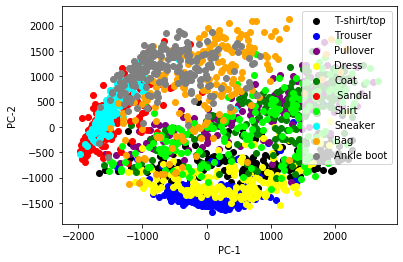

In [14]:
legend_name_list= ['T-shirt/top','Trouser','Pullover','Dress','Coat',' Sandal','Shirt','Sneaker','Bag', 'Ankle boot']
plot_pca_scatter(X_pca,legend_name_list)

### 分析：
* 本数据集的前两个主成分的特征散点图相互重合度明显高于原Mnist数据集，说明 Fashion Mnist的分类难度更大
* 尤其是中间紫色的套头衫，浅绿色的衬衫，黑色的T恤和深绿色的外套重合度较高，这四者本身外形确实十分相像
* 其次是三种鞋子也难以区分，海蓝色的运动鞋，灰色的低帮鞋和红色凉鞋
* 最容易区分的橘色的包和蓝色的长裤和黄色裙子，这三者特征较为明显

#### 取前三个主成分，绘制特征散点图

In [89]:
%matplotlib notebook

In [29]:
N=1000 #只画N个点，否则太多看不清楚
from mpl_toolkits.mplot3d import Axes3D
def plot_pca_scatter_3d(X_pca):
    fig = plt.figure()
    ax1 = plt.axes(projection='3d')
    # 10 种颜色
    colors = ['black', 'blue', 'purple', 'yellow', 'green', 'red', 'lime', 'cyan', 'orange', 'gray']
    # for 循环
    for i in range(len(colors)):
        px = X_pca[:N, 0][y_train[:N] == i]
        py = X_pca[:N, 1][y_train[:N] == i]
        pz = X_pca[:N, 2][y_train[:N] == i]
        ax1.scatter3D(px, py, pz,c=colors[i])
    #plt.legend(digits.target_names)
    ax1.set_xlabel('PC-1')
    ax1.set_ylabel('PC-2')
    ax1.set_zlabel('PC-3')

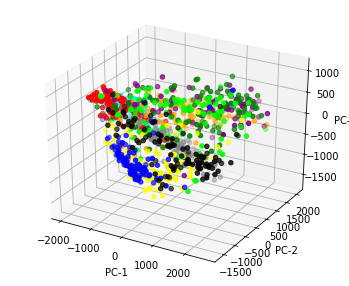

In [20]:
plot_pca_scatter_3d(X_pca)

#### 提取 PCA 对象的 components_ 属性，并绘制图象

In [15]:
estimator.components_.shape

(10, 784)

In [16]:
# 输出主成分
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((28, 28)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

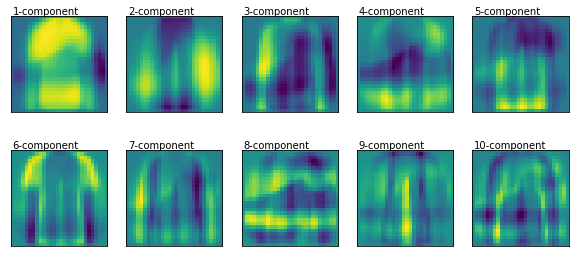

In [17]:
n_row, n_col = 2, 5
print_pca_components(estimator.components_, n_col, n_row)

### 分析：
* 每个主成分都可用于区分某些特定的目标
* 几乎所有主成分中都隐约可以看见一只鞋的影子
* 第一个主成分主要用于区别衣服，浅暗的部分有长袖的团，亮的部分是短袖
* 第二个主成分主要用于标记长裤的特征
* 第九个可以看到裙子的影子

## Cifar-10
### 导入数据集

In [46]:
train_data2,test_data2=tf.keras.datasets.cifar10.load_data()
X_train2, y_train2=train_data2
X_test2, y_test2=test_data2

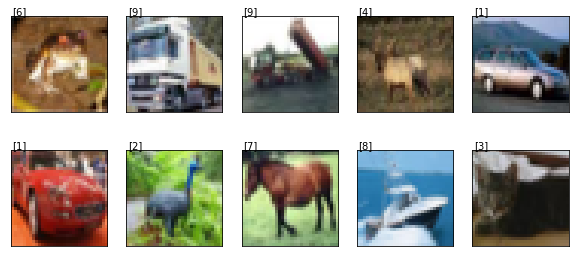

In [19]:
print_digits(X_train2, y_train2, max_n=10)

| Label | Description |
| --- | ---|
| 0 | airplane |
| 1 | automobile |
| 2 | bird |
| 3 | cat |
| 4 | deer |
| 5 | dog |
| 6 | frog |
| 7 | horse |
| 8 | ship |
| 9 | truck |

## EDA
#### 观察训练集和测试集维度

In [20]:
X_train2

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [32]:
print('X_train2:',X_train2.shape)
print('y_train2:',y_train2.shape)
print('X_test2:',X_test2.shape)
print('y_test2:',y_test2.shape)

X_train2: (50000, 32, 32, 3)
y_train2: (50000, 1)
X_test2: (10000, 32, 32, 3)
y_test2: (10000, 1)


In [60]:
X_train2_new=X_train2.astype('float32')/255.0
X_test2_new=X_test2.astype('float32')/255.0

In [62]:
X_train2.shape[2]

32

因为是彩色的，所以比Fashion Mnist 多一维

### 将彩色图转化为灰度图

In [70]:
N=5000
X_train2_gray=np.zeros([N,X_train2.shape[1],X_train2.shape[2]])
for i in range(N):
    for j in range(X_train2.shape[1]):
        for k in range(X_train2.shape[2]):
            #R*0.3+G*0.59+B*0.11  
            X_train2_gray[i][j][k]=X_train2[i][j][k][0]*0.3+X_train2[i][j][k][1]*0.59+X_train2[i][j][k][2]*0.11

In [71]:
X_train2_gray.shape

(5000, 32, 32)

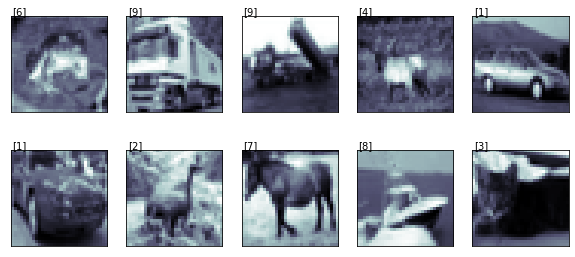

In [72]:
print_digits(X_train2_gray, y_train2, max_n=10)

In [74]:
X_train2_new=np.reshape(X_train2_gray,(N,-1))
print('X_train2_new:',X_train2_new.shape)

X_train2_new: (5000, 1024)


## PCA
#### 创建 PCA 对象

In [75]:
estimator2 = PCA(n_components=10) # 10个主成分
X_pca2 = estimator2.fit_transform(X_train2_new)

In [76]:
X_pca2.shape

(5000, 10)

#### 降维后各主成分的累计方差贡献率

In [77]:
X_pca2.std(axis=0)

array([1074.07293136,  687.9817191 ,  522.61532103,  394.33470878,
        348.34425796,  333.58604075,  303.8082025 ,  297.21532033,
        247.58716865,  237.48695093])

####  取前两个主成分，绘制特征散点图

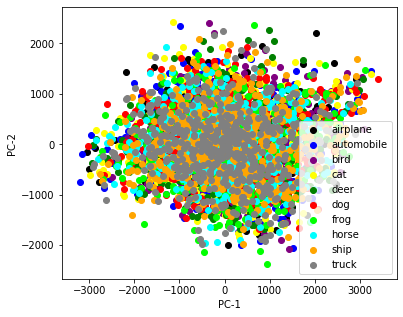

In [78]:
legend_name_list2=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plot_pca_scatter(X_pca2,legend_name_list2)

### 分析
* 相比课堂上的Mnist和作业中Fashion Mnist两个数据集，Cifar10明显更难区分
* 两个主要特征完全无法区分各个目标

#### 取前三个主成分，绘制特征散点图

<IPython.core.display.Javascript object>


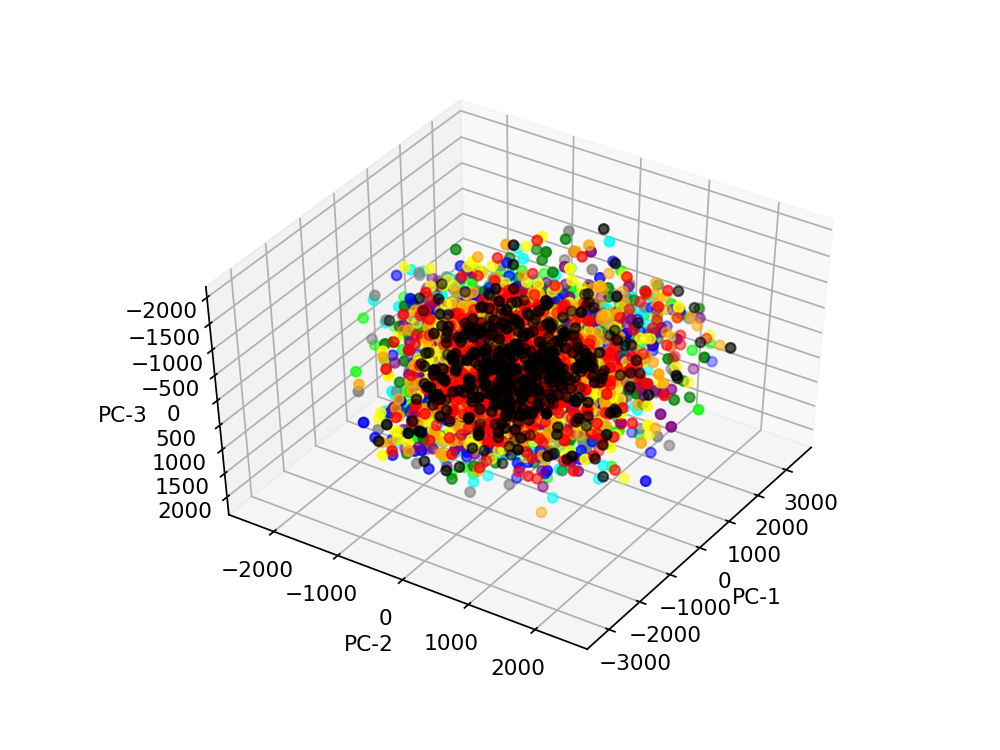

In [90]:
plot_pca_scatter_3d(X_pca2)

### 分析
* 即使是用前三个特征也较难区分

In [80]:
estimator2.components_.shape

(10, 1024)

In [87]:
# 输出主成分
def print_pca_components2(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(32,32), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

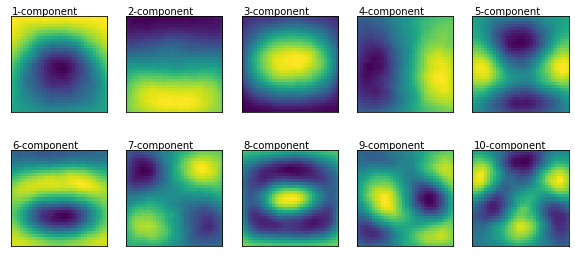

In [88]:
n_row, n_col = 2, 5
print_pca_components2(estimator2.components_, n_col, n_row)

### 分析：
* 相比Fashion Mnist此数据集的PCA特征对象的 components_ 属性的图象就显得比较抽象

## 2、Fashion MNIST 数据集简介


- 目的 —— 用来替代 MNIST 的图像数据集


- 提供者 —— 德国时尚科技公司 Zalando


- 特点
    - 10 种类别、7 万个不同商品的正面图片
    - 与原始 MNIST 高度相似（大小、格式和训练集/测试集划分）


- 数据集
    - 训练集 60000
    - 测试集 10000
    - 28x28 的灰度图片


- 下载 —— 开源数据网站 [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)


- 图片样例
<img src="images/fashion-mnist-sample.png">

## 3、CIFAR-10 数据集简介


- 数据集下载

[https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)

- 整理者，Hinton 的学生
    - Alex Krizhevsky
    - Ilya Sutskever


- 特点 —— 用于识别普通物体的小型数据集，含10个分类的 RGB 彩色图片
    - 飞机（ airplane ）
    - 汽车（ automobile ）
    - 鸟类（ bird ）
    - 猫（ cat ）
    - 鹿（ deer ）
    - 狗（ dog ）
    - 蛙类（ frog ）
    - 马（ horse ）
    - 船（ ship ）
    - 卡车（ truck ）


- 图片尺寸 ——  32×32 


- 数据集
    - 训练集 50000 张图片
    - 测试集 10000 张图片


- 图片样例

<img src="images/cifar-10-sample.png" />


## 4、CIFAR-100 数据集简介（挑战自己吧）


- 数据集下载

[http://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz](http://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz)

## 5、下次作业预告


- 针对调研数据集的聚类分析 —— 结合 PCA


- 建议
    - 自己练习回头进行分类识别分析